<a href="https://colab.research.google.com/github/katemanee006/DADS-6003/blob/main/ml_6610422006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step1 Import Necessary Library**

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv('/Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# **Step2 Check Missing Data**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# **Step3 Clean Data**

In [ ]:
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda b: 1 if b == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda c: 1 if c == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda d: 1 if d == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda e: 1 if e == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda f: 1 if f == 'yes' else 0)
data['furnishingstatus'] = data['furnishingstatus'].apply(lambda g: 2 if g == 'furnished' else (1 if g == 'semi-furnished' else 0))
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


# **Step4 Train&Predict**

In [ ]:
#X = data[["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]]
X = data.iloc[:,1:]
#print(X.head())

#y = data.price
y = data.iloc[:,0]
#print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

"""Train model"""
print("Train")
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #training process
print(f'intercept=',lin_reg.intercept_) #theta0
print(f'coeffeicient=',lin_reg.coef_) #theta1, theta2,...

"""Predict"""

y_pred = lin_reg.predict(X_test)


Train
intercept= -416556.15363121964
coeffeicient= [2.41610880e+02 9.35881551e+04 1.13879457e+06 4.06108618e+05
 5.75813357e+05 3.83715682e+05 2.83176407e+05 8.62897012e+05
 8.36787847e+05 2.44832985e+05 6.02828933e+05 2.19377625e+05]


# **Step5 Print Linear Regression**

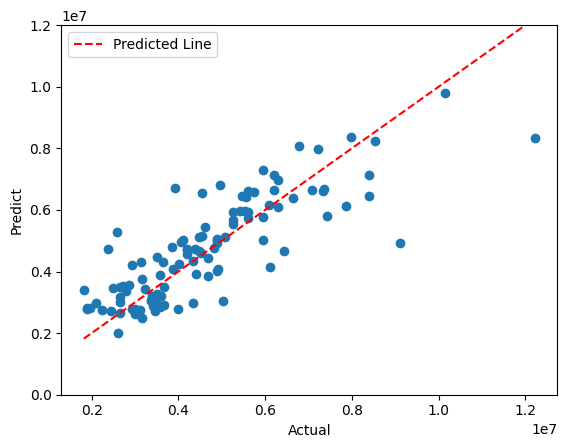

In [ ]:
"""print linear"""
plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predict")

# Create a line from min to max of y_test for visualizing a linear relationship
x_line = np.linspace(min(y_test),max(y_test),100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--', label='Predicted Line')

plt.ylim(0, 1.2e7)
plt.legend()
plt.show()

# **Step6 Find Mean squared error**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error(MSE):',mse)

Mean Squared Error(MSE): 1142383874558.437


# **Step7 Deploy**

In [ ]:
"""Deploy"""
print("Deploy")
pickle.dump(lin_reg, open('ml_6610422006.sav','wb') )
from google.colab import files
files.download('ml_6610422006.sav')

Deploy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>